In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../../005_src/') #use relative path
os.chdir("../../005_src")

from config import *


----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [5]:
this_date = "20210723"
ts = "11h04m50s"#"21h12m45s"#"22h28m11s"#"21h30m51s"#"18h37m00s"#"20h33m28s"#"19h37m02s" #"13h15m59s"
GCN_num = "013"
this_GCN = f"GCN_{GCN_num}"
print (this_GCN)

from _03_Networks.GCN_013.GCN_model_013 import *
from _03_Networks.GCN_013.GCN_trainer_013 import *
this_GCN, ts_import = check_import()

GCN_013
imported trainer: GCN_013 at 16h39m58s


## Reload dictionary

In [6]:

MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-11h04m50s/


{'input_file_name': '20210721-23h05m03s_timesteps90095_ec3500_em7000',
 'max_num_veh': 10,
 'sim_duration_timesteps': '100000',
 'run_date': '20210723-',
 'run_time': '11h04m50s',
 'model': 'GCN_013',
 'combo': ['mean',
  512,
  'Adam',
  'L1',
  [128, 256, 64],
  0.001,
  0.6,
  0,
  'CosineAnnealingWarmRestarts',
  False,
  'tanh'],
 'random_seed': 42,
 'train_size': 0.9,
 'batch_size': 512,
 'Nepochs': 20000,
 'save_every': 4000,
 'transformstat': False,
 'plotstat': True,
 'printstat': False,
 'intentionstat': 'obsoleted',
 'use_edges_attr': False,
 'activation_function': 'tanh',
 'shuttle_train_frame': None,
 'shuttle_val_frame': None,
 'num_rows_training': 53793,
 'num_rows_validation': 5380,
 'num_rows_test': 598,
 'exclude_yaw': 'obsoleted',
 'concatenatestat': 'obsoleted',
 'paddingstat': 'obsoleted',
 'size_input': 6,
 'size_output': 3,
 'model_architecture': GCN_HL03_tanh(
   (conv1): GCNConv(6, 128)
   (conv2): GCNConv(128, 256)
   (conv3): GCNConv(256, 64)
   (conv4): GCNC

In [7]:
input_file_name = reloaded_dict["input_file_name"]
reloaded_dict["model_architecture"]

GCN_HL03_tanh(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 256)
  (conv3): GCNConv(256, 64)
  (conv4): GCNConv(64, 3)
)

## Plot losses

In [8]:
# load losses
t_losses_load = pkl.load(open( reloaded_dict['train_losses_path'], 'rb'))
v_losses_load = pkl.load(open( reloaded_dict['val_losses_path'], 'rb'))
lr_load = pkl.load(open( reloaded_dict['lr_path'], 'rb'))

In [9]:
#list(range(0,len(lr_load),1)),
#lr_load

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-11h04m50s/20210723-11h04m50s_train_val_loss_plot.png


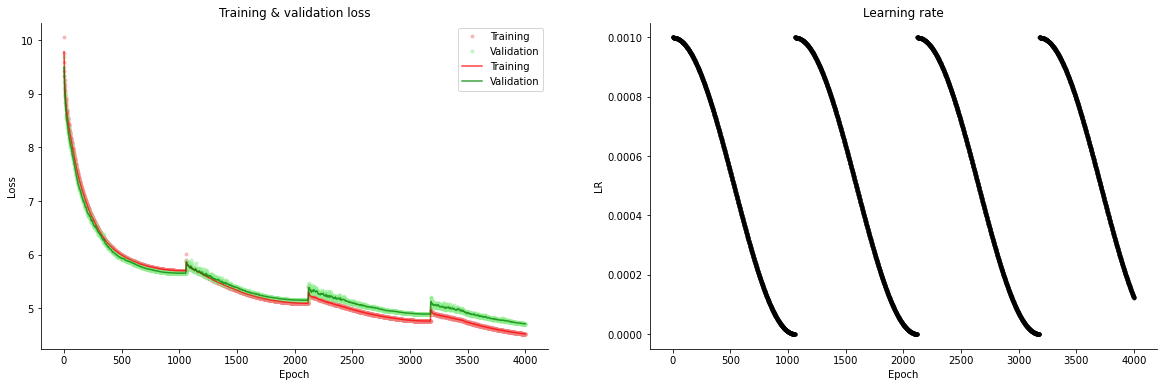

In [10]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load,
                  v_losses_load,
                  learning_rate = lr_load,
                  gaussian=True,
                  sigma=2,
                  figsize=(20, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

## Verification
of results

In [11]:
hidden_layers_sizes = reloaded_dict["hidden_layers_sizes"]
size_input = reloaded_dict['size_input']
size_output = reloaded_dict['size_output']
random_seed = reloaded_dict["random_seed"]
activation_fun = reloaded_dict["activation_function"]

In [12]:


##================================
## MODEL INIT
##================================
num_hidden_layers = len(hidden_layers_sizes)

## TANH

if activation_fun == "tanh":
    if num_hidden_layers == 1:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = None
        hc_3 = None

        model = GCN_HL01_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            )
    elif num_hidden_layers == 2:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = None

        model = GCN_HL02_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            )
    elif num_hidden_layers == 3:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            hc_3 = hc_3,
                            )
    else:
        print (f"ERROR: model with {num_hidden_layers=} not implemented")
        print (f"using first three layers")

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_tanh(num_input_features=size_input,
                    num_output_features =size_output,
                    random_seed = random_seed,
                    hc_1 = hc_1,
                    hc_2 = hc_2,
                    hc_3 = hc_3,
                    )
        
#### RELU       
        
elif activation_fun == "relu": 
    if num_hidden_layers == 1:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = None
        hc_3 = None

        model = GCN_HL01_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            )
    elif num_hidden_layers == 2:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = None

        model = GCN_HL02_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            )
    elif num_hidden_layers == 3:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            hc_3 = hc_3,
                            )
    else:
        print (f"ERROR: model with {num_hidden_layers=} not implemented")
        print (f"using first three layers")

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_relu(num_input_features=size_input,
                    num_output_features =size_output,
                    random_seed = random_seed,
                    hc_1 = hc_1,
                    hc_2 = hc_2,
                    hc_3 = hc_3,
                    )
        
elif activation_fun == "leaky_relu": 
    if num_hidden_layers == 1:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = None
        hc_3 = None

        model = GCN_HL01_leaky_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            )
    elif num_hidden_layers == 2:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = None

        model = GCN_HL02_leaky_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            )
    elif num_hidden_layers == 3:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_rrelu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            hc_3 = hc_3,
                            )
    else:
        print (f"ERROR: model with {num_hidden_layers=} not implemented")
        print (f"using first three layers")

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_leaky_relu(num_input_features=size_input,
                    num_output_features =size_output,
                    random_seed = random_seed,
                    hc_1 = hc_1,
                    hc_2 = hc_2,
                    hc_3 = hc_3,
                    )
load_model = model

In [13]:
load_path = reloaded_dict['model_path']
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

GCN_HL03_tanh(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 256)
  (conv3): GCNConv(256, 64)
  (conv4): GCNConv(64, 3)
)

In [14]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'{input_file_name}_dataset*',
                                     recursive=True))
if len( datasets_list) == 5:                               
        print ("\n> DATASETS FOUND")
        print (*datasets_list, sep = "\n")
        
        dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
        # map_location=lambda storage, loc: storage.cuda(0))
        dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
        dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
        dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
        dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )

In [17]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_validation_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

1it [00:00,  9.35it/s]

found 1 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-11h04m50s/figures_validation_set/
the gif will be create using the first 1 images


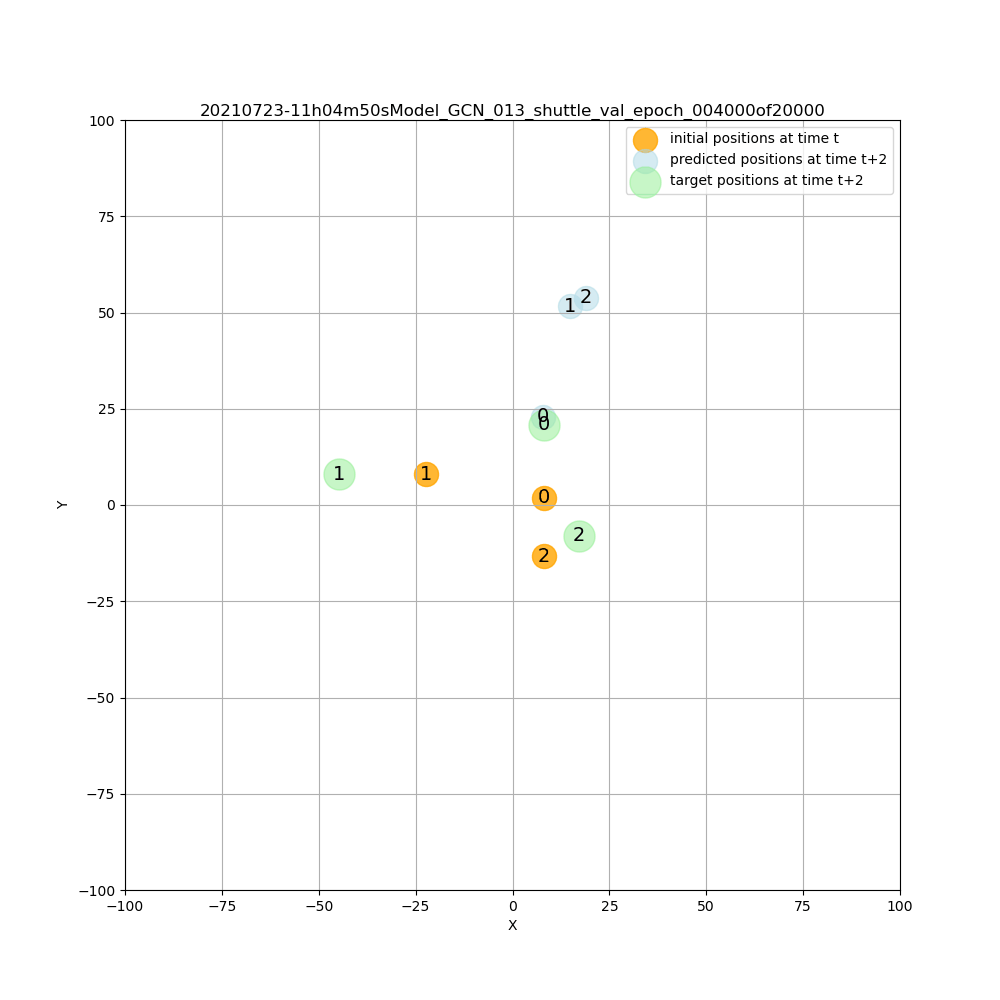

In [18]:
Image(open(f'{path_GIF}','rb').read())

In [19]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_training_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

1it [00:00, 11.23it/s]

found 1 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-11h04m50s/figures_training_set/
the gif will be create using the first 1 images


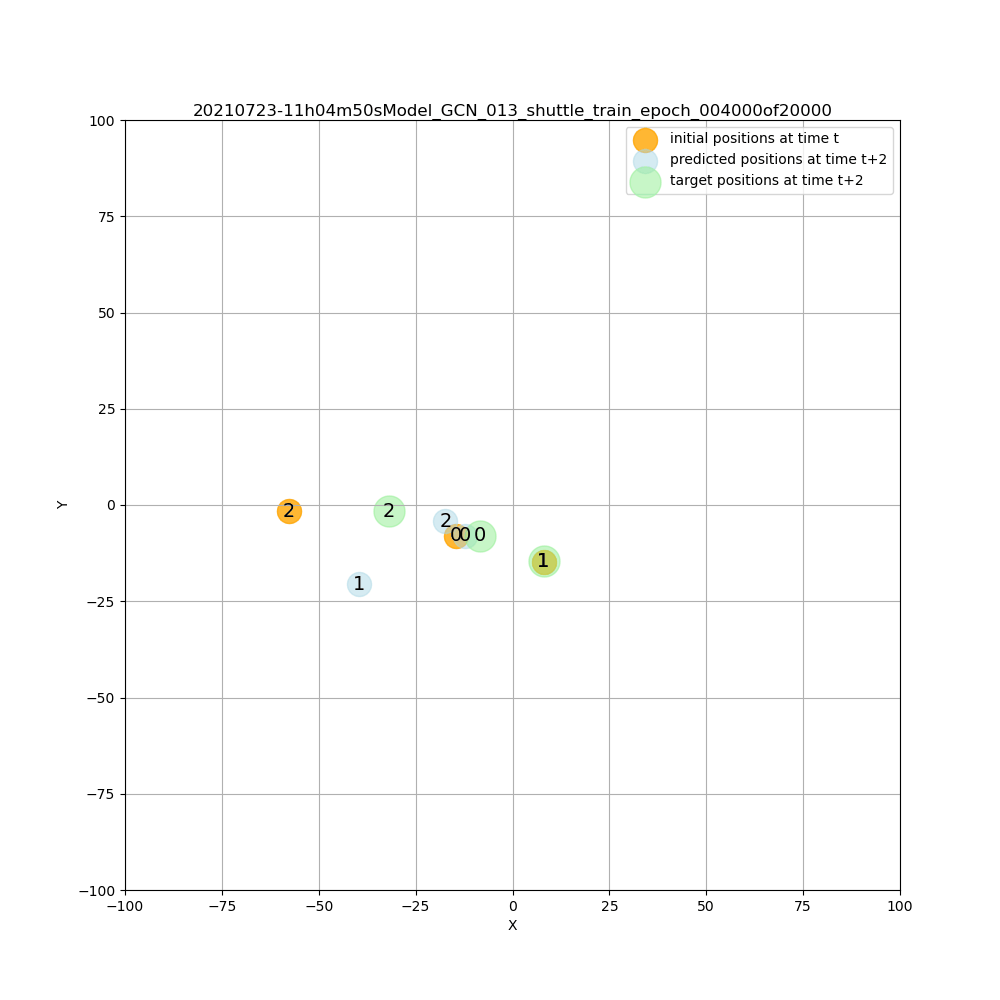

In [20]:
Image(open(f'{path_GIF}','rb').read())

In [21]:
deleted_folders = delete_empty_r(directory= MODEL_OUTPUT_PATH,printstat = True)

deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-11h03m56s/figures_training_set
deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-11h03m56s/figures_validation_set
deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-11h03m56s
deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/DATASETS/.ipynb_checkpoints
deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-09h48m22s/figures_training_set
deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-09h48m22s
deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-09h56m20s/figures_training_set
deleted path: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/20210723-09h56m20s
deleted path: /storage/remote/atc